<a href="https://www.kaggle.com/code/naiimarejeb/task-03?scriptVersionId=254033984" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *Bank Marketing Campaign Prediction - Decision Tree Classifier*

**1. Environment Setup**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

**2. Loading the Dataset and Exploring the Data**

In [2]:
df = pd.read_csv("/kaggle/input/bank-dataset/bank.csv")

In [3]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."



> Note:
>
> The data appears to have:
>
> A delimiter issue (a mix of ; and :)
> 
> Misplaced quotation marks
> 
> Irregular formatting


In [4]:
# Solution 

from IPython.display import display

df = pd.read_csv('/kaggle/input/bank-dataset/bank.csv', sep=';', engine='python')  

df = df.replace('"', '', regex=True)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [7]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1823,35,technician,divorced,secondary,no,473,yes,yes,unknown,26,may,434,4,-1,0,unknown,no


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


The values of y are:  ['no' 'yes']
The occurrences of each value:  y
no     4000
yes     521
Name: count, dtype: int64


<Axes: xlabel='y'>

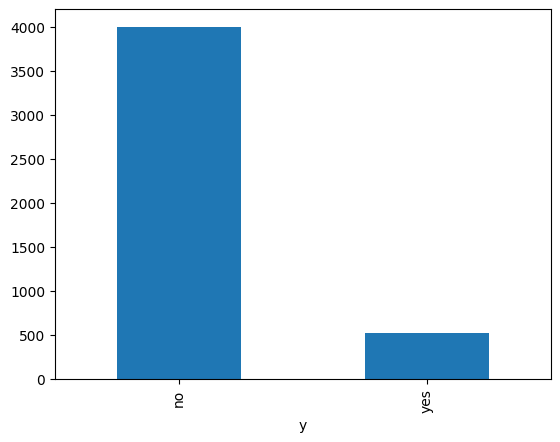

In [9]:
print("The values of y are: ", df["y"].unique())
print("The occurrences of each value: ", df['y'].value_counts())
df['y'].value_counts().plot(kind='bar')

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
df.duplicated().sum()

0

**3. Data Preprocessing**

In [12]:
print(df.select_dtypes(include=['object']).columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [13]:
# ML algorithms (such as the decision tree used here) only understand numerical values
# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting features and target
X = df.drop('y', axis=1)
Y = df["y"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [15]:
df["marital"].unique()

array([1, 2, 0])

In [16]:
# Mapping between encoded values and original values

# Retrieve the encoder for the "marital" variable
le = label_encoders["marital"]

# Display the mapping
print("Mapping for the 'marital' column:")
for i, classe in enumerate(le.classes_):
    print(f"{i} -> {classe}")

Mapping for the 'marital' column:
0 -> divorced
1 -> married
2 -> single


In [17]:
# If I haven't saved the encoder (label_encoders)
# The original values are ["single", "married", "divorced"]
# le = LabelEncoder()
# le.fit(["single", "married", "divorced"])

# Display the mapping
# print(dict(zip(le.transform(le.classes_), le.classes_)))

In [18]:
# Initial Model
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Evaluation
y_pred = dt_base.predict(x_test)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:\n", accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1201
           1       0.43      0.44      0.43       156

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357

Confusion matrix:
 [[1110   91]
 [  88   68]]
Accuracy:
 0.8680913780397936


In [20]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Final model with the best parameters
dt_final = DecisionTreeClassifier(**best_params, random_state=42)
dt_final.fit(x_train, y_train)

# Final evaluation
y_pred_final = dt_final.predict(x_test)
print("Final Classification Report:\n", classification_report(y_test, y_pred_final))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Final Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1201
           1       0.40      0.40      0.40       156

    accuracy                           0.86      1357
   macro avg       0.66      0.66      0.66      1357
weighted avg       0.86      0.86      0.86      1357



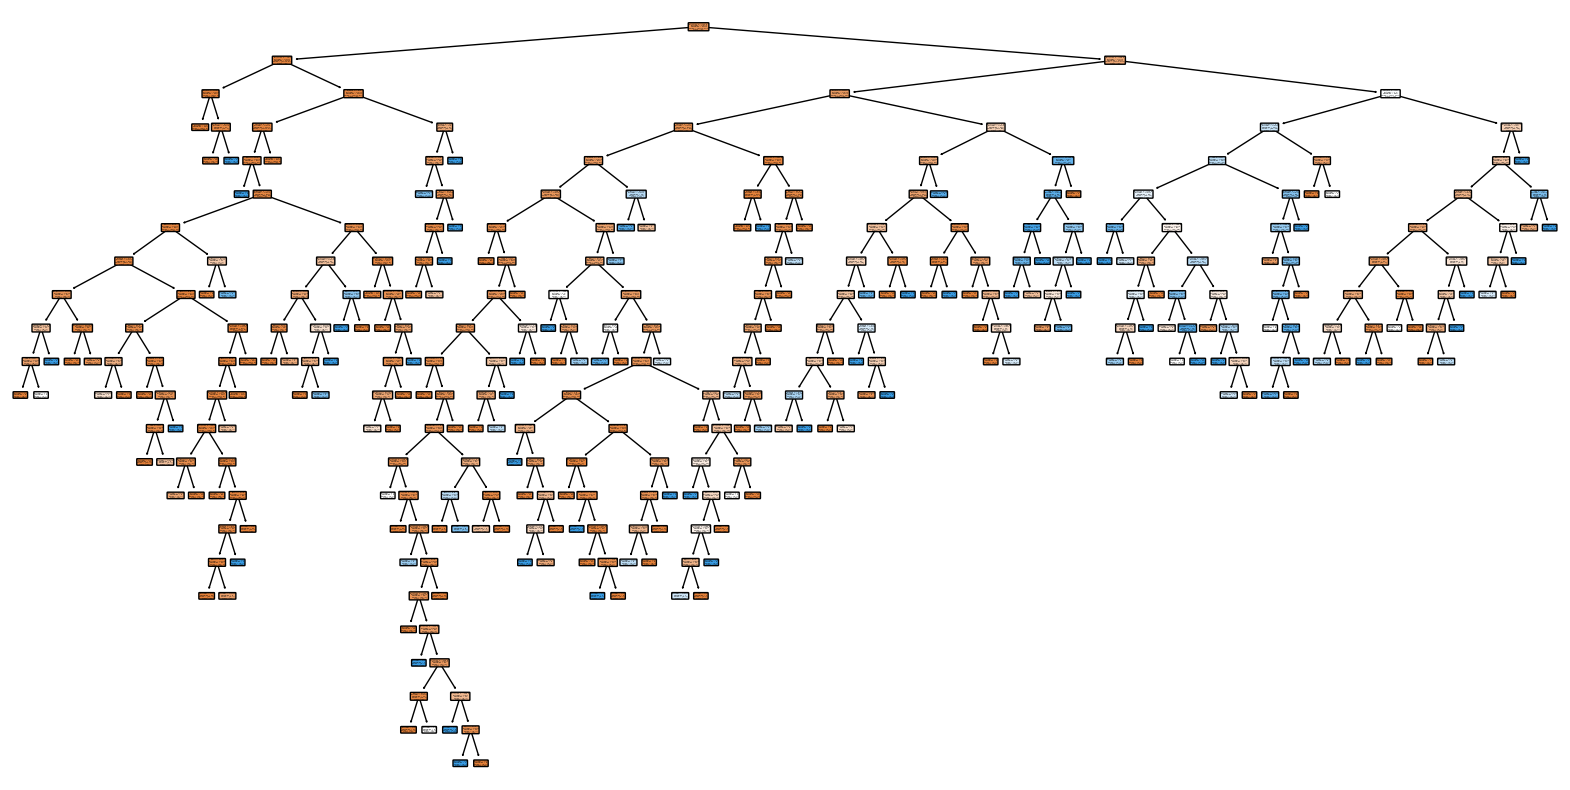

           importance
duration     0.374862
pdays        0.103395
age          0.100119
balance      0.088007
month        0.064980
day          0.062795
contact      0.051058
poutcome     0.041236
campaign     0.030926
job          0.026461
previous     0.016805
education    0.014508
marital      0.011020
housing      0.006999
loan         0.006828
default      0.000000


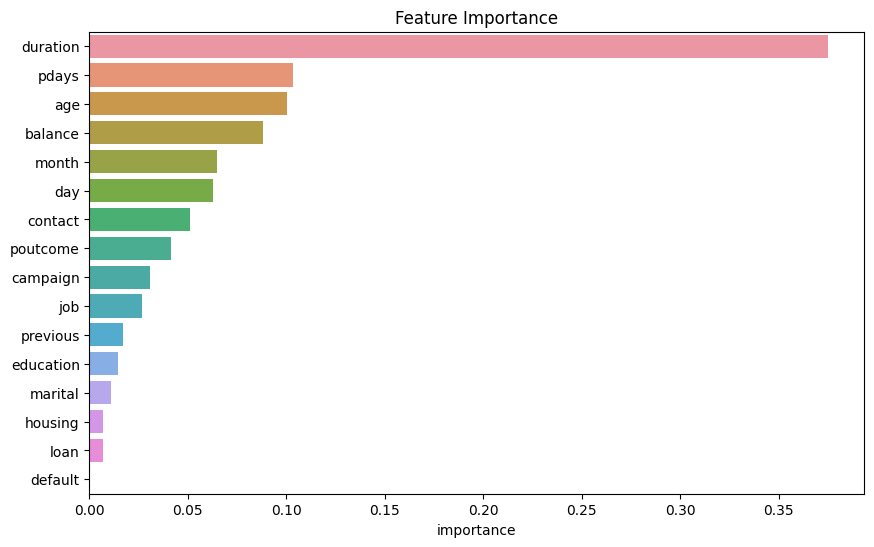

In [21]:
# Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_final, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Feature importance
feature_importances = pd.DataFrame(dt_final.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()